In [9]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
from bs4 import BeautifulSoup
import re
import csv 

In [10]:
url = 'https://map.naver.com/v5/search'
driver = webdriver.Chrome(executable_path=r'D:\temp\chromedriver.exe')
# driver = webdriver.Chrome('./chromedriver',chrome_options=options) # 크롬창 숨기기
driver.get(url)
key_word = '부천치킨'  # 검색어

In [11]:
def time_wait(num, code):
    try:
        wait = WebDriverWait(driver, num).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, code)))
    except:
        print(code, '태그를 찾지 못하였습니다.')
        driver.quit()
    return wait

In [12]:
# css를 찾을때 까지 10초 대기
time_wait(10, 'div.input_box > input.input_search')

# 검색창 찾기
search = driver.find_element_by_css_selector('div.input_box > input.input_search')
search.send_keys(key_word)  # 검색어 입력
search.send_keys(Keys.ENTER)  # 엔터버튼 누르기

res = driver.page_source  # 페이지 소스 가져오기
soup = BeautifulSoup(res, 'html.parser')  # html 파싱하여  가져온다
sleep(1)


# frame 변경 메소드
def switch_frame(frame):
    driver.switch_to.default_content()  # frame 초기화
    driver.switch_to.frame(frame)  # frame 변경
    res
    soup


# 페이지 다운
def page_down(num):
    body = driver.find_element_by_css_selector('body')
    body.click()
    for i in range(num):
        body.send_keys(Keys.PAGE_DOWN)

In [13]:
# frame 변경
switch_frame('searchIframe')
page_down(40)
sleep(5)

# 매장 리스트
store_list = driver.find_elements(By.CSS_SELECTOR, '._1EKsQ')
# 페이지 리스트
next_btn = driver.find_elements(By.CSS_SELECTOR, '._2ky45 > a')

place_name_list = [] #매장 이름
place_url_arr=[] #매장 url

# 시작시간
start = time.time()
print('[크롤링 시작...]')

# 크롤링 (페이지 리스트 만큼)
for btn in range(len(next_btn))[1:2]:  # next_btn[0] = 이전 페이지 버튼 무시 -> [1]부터 시작
    store_list = driver.find_elements(By.CSS_SELECTOR, '._1EKsQ')

    for data in range(len(store_list)-48):  # 매장 리스트 만큼
        page = driver.find_elements_by_css_selector('.OXiLu')
        page[data].click() #엔터
        sleep(2)
        
        try:
            # 상세 페이지로 이동
            switch_frame('entryIframe')
            time_wait(3, '._3XamX')
   
            # -----매장명 가져오기-----
            store_name = driver.find_element_by_css_selector('._3XamX').text
            place_name_list.append(key_word+" "+store_name)
            print(key_word+" "+store_name)

            switch_frame('searchIframe')
            sleep(1)

        except:
            print('ERROR!' * 3)

    # 다음 페이지 버튼
    if page[-1]:  # 마지막 매장일 경우 다음버튼 클릭
        next_btn[-1].click()
        sleep(2)
    else:
        print('페이지 인식 못함')
        break

print('[데이터 수집 완료]\n소요 시간 :', time.time() - start)
#driver.quit()  # 작업이 끝나면 창을닫는다.

place_name_list


[크롤링 시작...]
data 0
page <selenium.webdriver.remote.webelement.WebElement (session="38f0d0d9e46421d800849ec6126a90b0", element="00c434de-4ffd-4d77-8022-1ac35f833263")>
부천치킨 구도로통닭 부천역점
data 1
page <selenium.webdriver.remote.webelement.WebElement (session="38f0d0d9e46421d800849ec6126a90b0", element="69f9fdbe-6db1-430a-9c65-b0f372a5a31a")>
부천치킨 아웃닭 부천현대점
data 2
page <selenium.webdriver.remote.webelement.WebElement (session="38f0d0d9e46421d800849ec6126a90b0", element="16d5c3f2-7091-40a5-aad3-a18f16849b35")>
부천치킨 야들리애치킨 중동위브점
[데이터 수집 완료]
소요 시간 : 11.419031381607056


['부천치킨 구도로통닭 부천역점', '부천치킨 아웃닭 부천현대점', '부천치킨 야들리애치킨 중동위브점']

In [14]:
page = driver.find_elements_by_css_selector('.OXiLu')
page[0].click()
sleep(2)

['1071155310']
부천치킨 구도로통닭 부천역점 : https://pcmap.place.naver.com/restaurant/1071155310/review/visitor#
[]
<html lang="ko"><head>
<title>검색 - 네이버 지도</title>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요." name="description"/>
<meta content="AO_6MCsaxSfiydw-JSF8cCpFrYPwZDiEo40pMwIwl7Q" name="google-site-verification"/>
<meta content="website" property="og:type"/>
<meta content="네이버 지도" property="og:site_name"/>
<meta content="네이버 지도" property="og:title"/>
<meta content="https://map.pstatic.net/res/file/content/global/static/naver/og_map.png" p
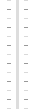
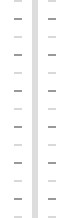
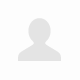
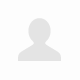
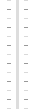
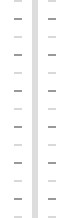
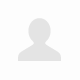
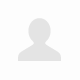

In [15]:
place_url_arr=[]
place_url_dic={}

for i, keyword in enumerate(place_name_list):
    try:
        naver_map_search_url = f'https://map.naver.com/v5/search/{keyword}/place'
        driver.get(naver_map_search_url)
        time.sleep(5)
        cu = driver.current_url
        res_code = re.findall(r"place/(\d+)", cu)
        
        print(res_code)
        if not res_code:
            res = driver.page_source  # 페이지 소스 가져오기
            soup = BeautifulSoup(res, 'html.parser')  # html 파싱하여  가져온다
            elements = soup.select('')
            print(soup)
            
            sleep(3)


        final_url = 'https://pcmap.place.naver.com/restaurant/'+res_code[0]+'/review/visitor#'
        
        place_url_dic={'name':keyword,'url':final_url}
        place_url_arr.append(place_url_dic)
        print(keyword+" : "+final_url)
    except IndexError:
        place_url_dic={'name':keyword,'url':'none'}
        place_url_arr.append(place_url_dic)
        print(keyword+" : none")

#driver.quit()

In [16]:
with open('place_name_url.csv', 'w', newline='') as csv_file:
    fieldnames = ['region', 'name','url']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for data in place_url_arr:
        writer.writerow(data)